# Describe the Problem

**What is the problem?**
_Based on historical data from April to September 2005 we need to predict if credit card holders will default on payments._
    
**What is the type of machine learning?**
_We will be using supervised machine learning for classification. As such we will be implementing Logistic Regression, K-Nearest Neighbors, Decision Trees, Random Forests, and Support Vector Machines_
    
**What are the feature variables and target variables?**
_The target variable in this project is if the credit card holder defaulted in their payment, represented in the data with 1 for "yes" or 0 for "no". The feature variables read as X1 through to X23. These include The amount of the given credit, the gender of the credit holder, their education level, the marital status, their age, History of pass payments per month as well as the previous month, finally the amount of the statement per month._


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Data exploration and preprocessing

**How did you explore the data?**
_We explored the data by examining distributions, and summary statistics._

   ID  credit_amount  gender  education  marital_status  age  \
0   1          20000       2          2               1   24   
1   2         120000       2          2               2   26   
2   3          90000       2          2               2   34   
3   4          50000       2          2               1   37   
4   5          50000       1          2               1   57   

   repayment_status_sep  repayment_status_aug  repayment_status_jul  \
0                     2                     2                    -1   
1                    -1                     2                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                    -1                     0                    -1   

   repayment_status_jun  ...  bill_statement_jun  bill_statement_may  \
0                    -1  ...                   0                   0   
1                     0  ...                

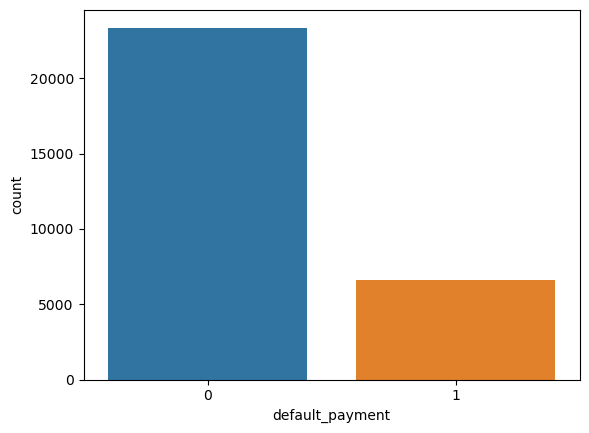

In [2]:
# Load data
url = "https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv"
df = pd.read_csv(url)

# Define the new column names for readability
new_column_names = {
    'X1': 'credit_amount',
    'X2': 'gender',
    'X3': 'education',
    'X4': 'marital_status',
    'X5': 'age',
    'X6': 'repayment_status_sep',
    'X7': 'repayment_status_aug',
    'X8': 'repayment_status_jul',
    'X9': 'repayment_status_jun',
    'X10': 'repayment_status_may',
    'X11': 'repayment_status_apr',
    'X12': 'bill_statement_sep',
    'X13': 'bill_statement_aug',
    'X14': 'bill_statement_jul',
    'X15': 'bill_statement_jun',
    'X16': 'bill_statement_may',
    'X17': 'bill_statement_apr',
    'X18': 'previous_payment_sep',
    'X19': 'previous_payment_aug',
    'X20': 'previous_payment_jul',
    'X21': 'previous_payment_jun',
    'X22': 'previous_payment_may',
    'X23': 'previous_payment_apr',
    'Y': 'default_payment'
}

# Rename the columns
df.rename(columns=new_column_names, inplace=True)

# Display the first few rows of the dataframe
print(df.head())

# Set display options for floating point numbers
pd.set_option('display.float_format', '{:.2f}'.format)

# Summary statistics
print(df.describe())

# Distribution of target variable
sns.countplot(x='default_payment', data=df)
plt.show()


**How did you clean the data (are there missing or invalid values)?**
    
_The data was cleaned by identifying missing values and removing those entries._

In [3]:
# Identify Missing Values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 ID                      0
credit_amount           0
gender                  0
education               0
marital_status          0
age                     0
repayment_status_sep    0
repayment_status_aug    0
repayment_status_jul    0
repayment_status_jun    0
repayment_status_may    0
repayment_status_apr    0
bill_statement_sep      0
bill_statement_aug      0
bill_statement_jul      0
bill_statement_jun      0
bill_statement_may      0
bill_statement_apr      0
previous_payment_sep    0
previous_payment_aug    0
previous_payment_jul    0
previous_payment_jun    0
previous_payment_may    0
previous_payment_apr    0
default_payment         0
dtype: int64



# Modeling
Split 20% data as the test set using the random status 123.

In [3]:
X = df.drop('default_payment', axis=1)
y = df['default_payment']

# Split the data - 80% training, 20% testing, random state of 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

# Checking the size of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 24000 samples
Test set size: 6000 samples


**What machine learning algorithms were used?**
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- Logistic Regression

Accuracy of SVM: 0.82
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4696
           1       0.66      0.35      0.45      1304

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy of Random Forest: 0.82
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4696
           1       0.62      0.38      0.47      1304

    accuracy                           0.82      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000

Accuracy of Logistic Regression: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4696
           1       0.71      0.24      0.36      1304

    accuracy                           0.81      6000
   macro avg       0.77      0.61   

<Axes: xlabel='model', ylabel='accuracy'>

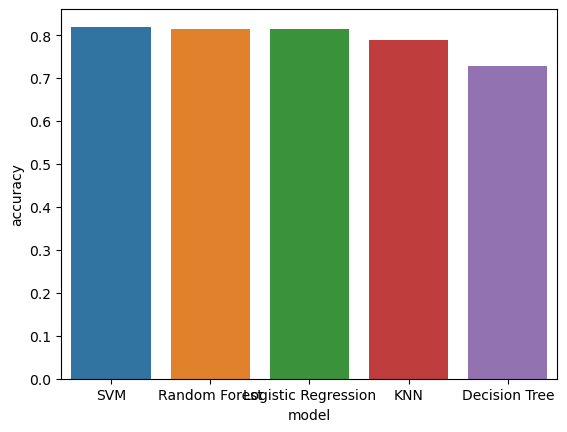

In [29]:
# Initialize models
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=123)
random_forest = RandomForestClassifier(random_state=123)
svm = SVC(random_state=123)
logistic_regression = LogisticRegression(random_state=123, max_iter=1000)  # Increased max_iter

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit models to the training data
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
logistic_regression.fit(X_train_scaled, y_train)

# Evaluate each model using the test set
models = [knn, decision_tree, random_forest, svm, logistic_regression]
model_names = ["KNN", "Decision Tree", "Random Forest", "SVM", "Logistic Regression"]
model_performance = []

for model, name in zip(models, model_names):
    if name in ["KNN", "SVM", "Logistic Regression"]:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    #report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0)
    report = classification_report(y_test, y_pred, zero_division=0)
    model_performance.append((name, accuracy, report))

# Sort by accuracy score in descending order
model_performance.sort(key=lambda x: x[1], reverse=True)

get_model =[]
get_accuracy =[]
# Print sorted results
for name, accuracy, report in model_performance:
    print(f"Accuracy of {name}: {accuracy:.2f}")
    get_model.append(name);
    get_accuracy.append(accuracy);
    print(report)

#Plot Accuracy of Training Data
data = {"model": get_model,"accuracy": get_accuracy}
data_Accuracy = pd.DataFrame(data)


sns.barplot(x="model",y="accuracy",data = data_Accuracy)

**What evaluation metric do you prefer?**
    
_There is no preference for an evaluation metric here. It is important to take all evaluation metrics into consideration. Those being Accuracy, precision and recall, and F1 score._
    
**How did you evaluate model's performance?**
    
_We evaluated theese model's performance using scikit-learn's accuracy_score and classification_report._
    
**How did you diagnose the model? Is it overfitting, under fitting, or good fitting?**

**Random Forest** (Accuracy: 0.82): Tied for best performance. We can consider this good fitting. 

**SVM** (Accuracy: 0.82): Displays very good performance. There is a solid balance between precision and recall for both classes.

**Logistic Regression)** (Accuracy: 0.81): Model displays good generalization and accuracy. But a low recall for "defaulted" suggests it is underfitting.

**KNN** (Accuracy: 0.79): This model may be slightly overfitting, considering the difference in precision and recall for the defaulted class. The lower recall for the defaulted class indicates potential issues in handling the minority class.

**Decision Tree** (Accuracy: 0.73): This model performed very well here and is good fitting. There is close accuracy between "defaulted" and "not defaulted".

# Results and discussion

**What is your model's results? Is it good? Do you have any concerns?**

Overall, our models performed very well. There was a consistent trend of having lower accuracy when predicting "defaulted". This would suggest that there may be room for improvement. 